In [1]:
# 
import matplotlib.pyplot as plt
import numpy as np
import pickle 
from datetime import date, datetime, timedelta
import xarray as xr
import netCDF4 as nc
import glob
import calendar
import os
#from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import scipy.stats
import math
import time
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from functions_for_vis_data_analysis import plot_maps, plot_hist, plot_hist_freq, plot_maps_nocolorbar
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


/home/users/jawahm/.conda/envs/hackathon/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
# approx pixel area = 2 to 3 km2
dir_name = '/gws/nopw/j04/parachute/ukceh/mtg_vis/' 
hours_of_day = np.arange(7,15)
hr_vis=[]
hr_norm_vis=[]
quantiles = [.99]
for i in hours_of_day:
    hour_of_day =  str(i).zfill(2)
    list_of_files=sorted(glob.glob(dir_name+"FCI*0401T"+hour_of_day+"*.nc"))
    #print(list_of_files)
    vis = []
    for i in list_of_files:
        ds = xr.open_dataset(i)
        vis.append(ds['vis_06_hr_effective_radiance'].values)
    mean_vis_for_hr_tmp = np.mean(np.array(vis),axis=0)
    # Calculate the percentiles
    mean_vis_for_hr= mean_vis_for_hr_tmp[~np.isnan(mean_vis_for_hr_tmp)]
    normalizing_factor_for_hr = np.quantile(mean_vis_for_hr, quantiles)
    hr_vis.append(mean_vis_for_hr_tmp)
    hr_norm_vis.append(mean_vis_for_hr_tmp/normalizing_factor_for_hr)

hr_vis = np.array(hr_vis)
hr_norm_vis = np.array(hr_norm_vis)
lat = ds['lat'].values
lon = ds['lon'].values

# mW.m-2.sr-1.(cm-1)-1
#  If these radiances are multiplied with the variable data..measured.radiance_unit_conversion_coefficient, 
# the effective radiances in units W.m-2.sr-1.µm-1 are obtained.


Text(0.5, 1.0, 'Hr of day- 8UTC')

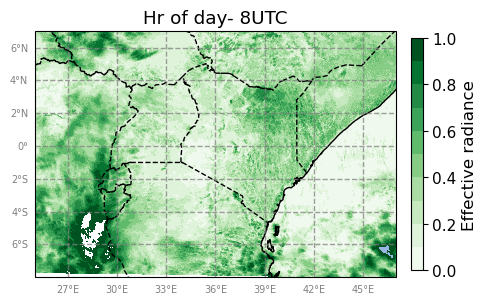

In [14]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection':ccrs.PlateCarree()})
#axes[0][3].set_visible(False)
hr_of_day=1
f=plt.figure(figsize=(5,5))  # this opens a plot window
ax = f.add_subplot(111, projection=ccrs.PlateCarree())  # this opens a new plot axis
plt.rcParams.update({'font.size': 11})
plot_maps(ax, lon, lat, np.squeeze(hr_norm_vis[hr_of_day,:,:]) ,levels_custom= np.arange(0,1.05,.1),plot_map='Greens',plot_label='Effective radiance')
plt.title('Hr of day- '+str(hr_of_day+7)+'UTC')

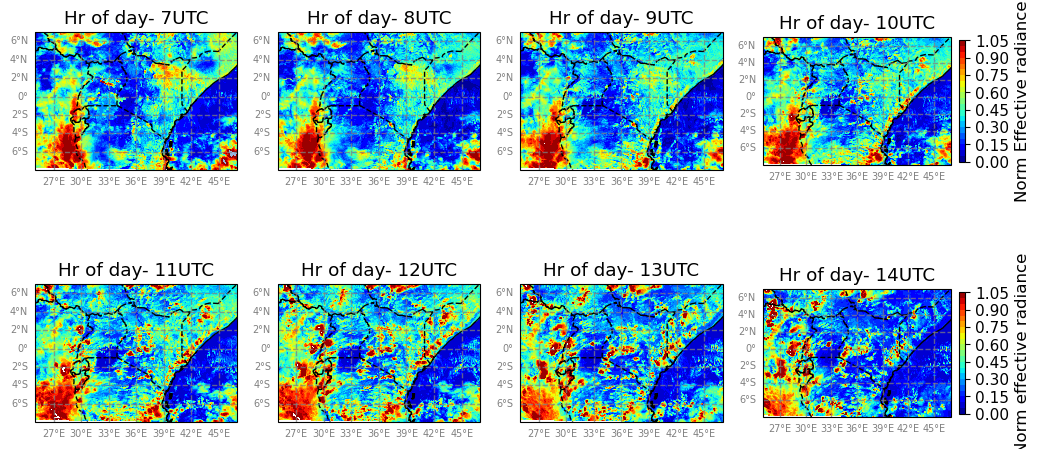

In [15]:

fig, axes = plt.subplots(2, 4, figsize=(12, 6), subplot_kw={'projection':ccrs.PlateCarree()})
#plt.rcParams.update({'font.size': 11})

for idx, ax in enumerate(axes[0]):
    if idx<3:
        plot_maps_nocolorbar(ax, lon, lat, np.squeeze(hr_norm_vis[idx,:,:]) ,levels_custom= np.arange(0,1.1,.05),plot_map='jet',plot_label='Norm Effective radiance')
        ax.set_title('Hr of day- '+str(idx+7)+'UTC')
    else:
        plot_maps(ax, lon, lat, np.squeeze(hr_norm_vis[idx,:,:]) ,levels_custom= np.arange(0,1.1,.05),plot_map='jet',plot_label='Norm Effective radiance')
        ax.set_title('Hr of day- '+str(idx+7)+'UTC')
        
for idx, ax in enumerate(axes[1]):
    if idx<3:
        plot_maps_nocolorbar(ax, lon, lat, np.squeeze(hr_norm_vis[idx+4,:,:]) ,levels_custom= np.arange(0,1.1,.05),plot_map='jet',plot_label='Norm effective radiance')
        ax.set_title('Hr of day- '+str(idx+4+7)+'UTC')
    else:
        plot_maps(ax, lon, lat, np.squeeze(hr_norm_vis[idx+4,:,:]) ,levels_custom= np.arange(0,1.1,.05),plot_map='jet',plot_label='Norm effective radiance')
        ax.set_title('Hr of day- '+str(idx+4+7)+'UTC')
   

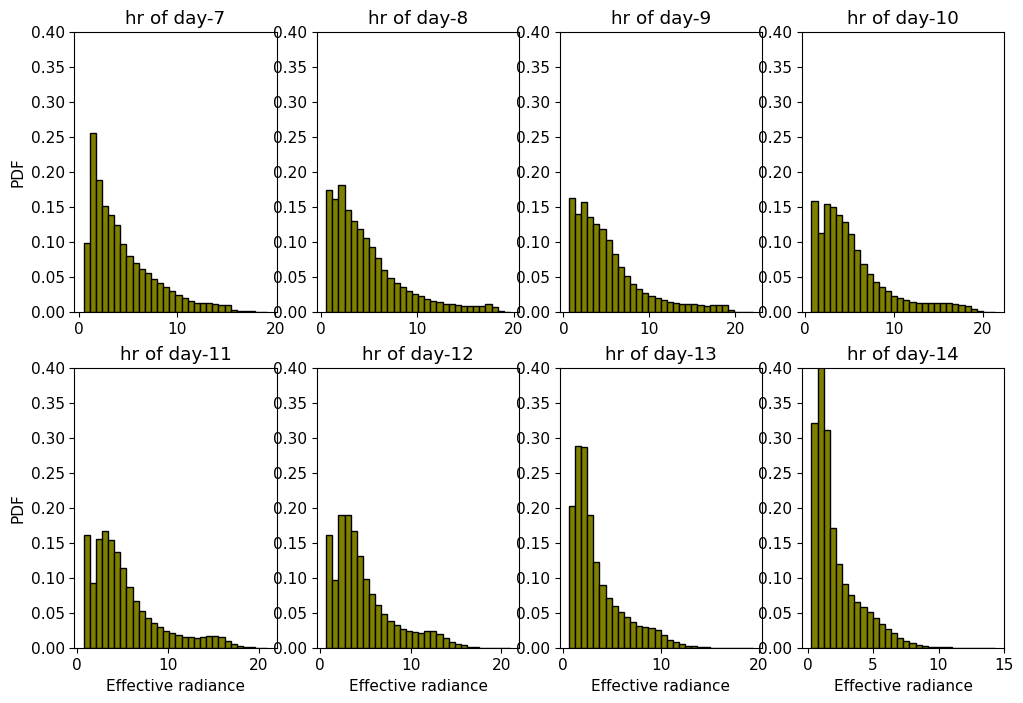

In [16]:
# plot histogram of dataset
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
    
for idx, ax in enumerate(axes[0]):
    if idx==0:
        data = np.squeeze(hr_vis[idx,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist(ax,data,nbins=30,ylabel='PDF',xlabel=None)
        ax.set_title('hr of day-'+str(hours_of_day[idx]))
        ax.set_ylim(0,.4)
    else:
        data = np.squeeze(hr_vis[idx,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist(ax,data,nbins=30,ylabel=None,xlabel=None)
        ax.set_title('hr of day-'+str(hours_of_day[idx]))
        ax.set_ylim(0,.4)

for idx, ax in enumerate(axes[1]):
    if idx==0:
        data = np.squeeze(hr_vis[idx+4,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist(ax,data,nbins=30,ylabel='PDF',xlabel='Effective radiance')
        ax.set_title('hr of day-'+str(hours_of_day[idx+4]))
        ax.set_ylim(0,.4)
    else:
        data = np.squeeze(hr_vis[idx+4,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist(ax,data,nbins=30,ylabel=None,xlabel='Effective radiance')
        ax.set_title('hr of day-'+str(hours_of_day[idx+4]))
        ax.set_ylim(0,.4)

#plt.savefig('effect_radiance_hr_of_day.png')

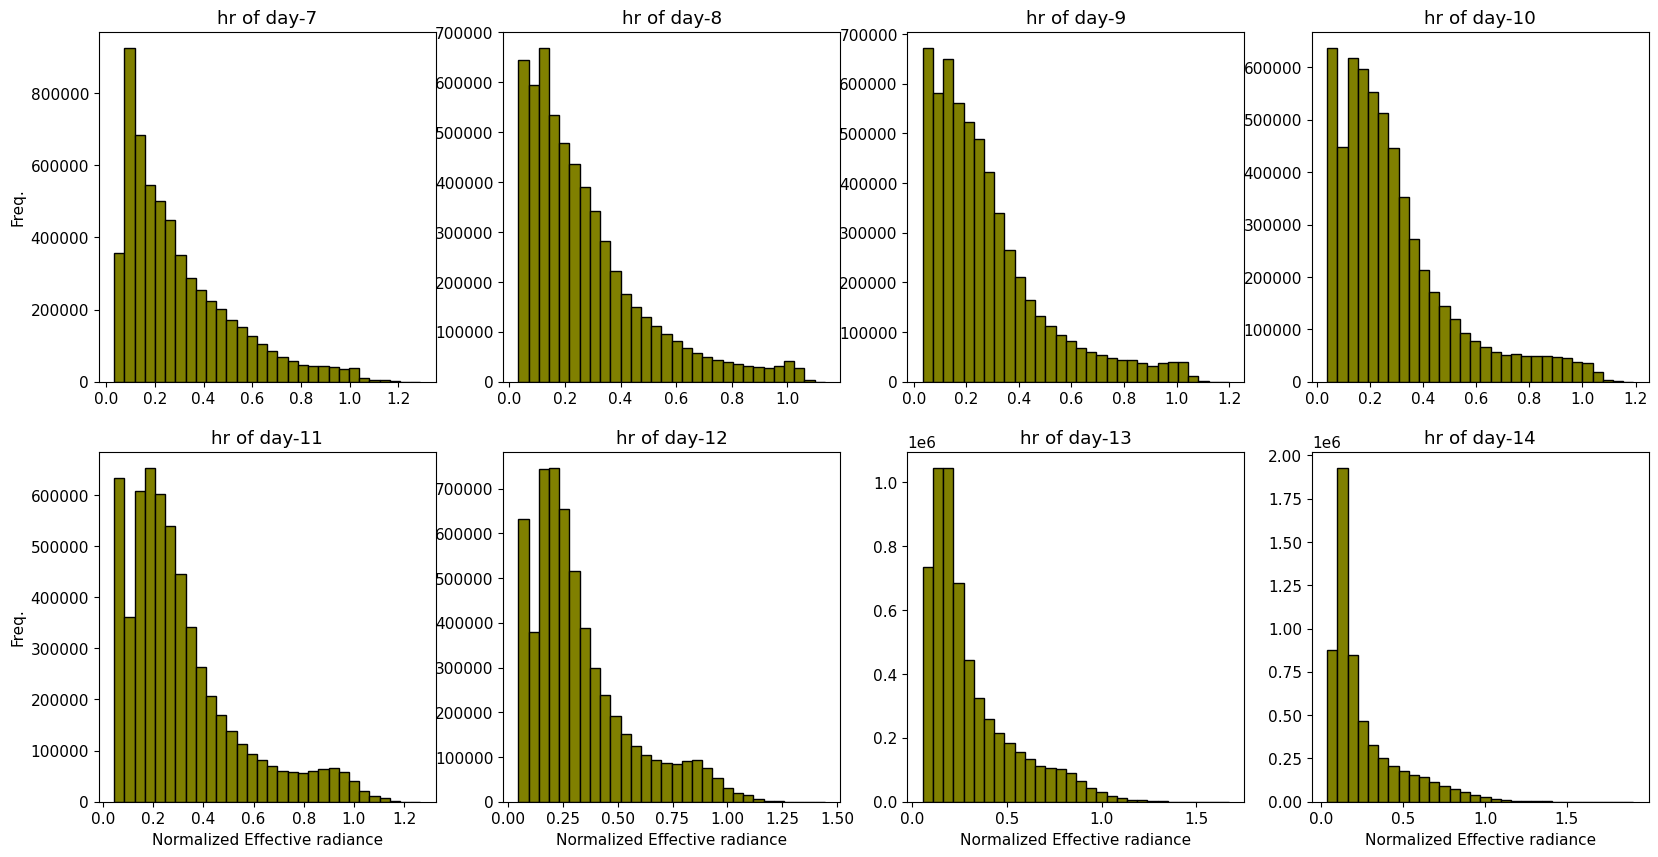

In [17]:
# plot histogram of dataset
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    
for idx, ax in enumerate(axes[0]):
    if idx==0:
        data = np.squeeze(hr_norm_vis[idx,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist_freq(ax,data,nbins=30,ylabel='Freq.',xlabel=None)
        ax.set_title('hr of day-'+str(hours_of_day[idx]))
        #ax.set_ylim(0,.4)
    else:
        data = np.squeeze(hr_norm_vis[idx,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist_freq(ax,data,nbins=30,ylabel=None,xlabel=None)
        ax.set_title('hr of day-'+str(hours_of_day[idx]))
        #ax.set_ylim(0,.4)

for idx, ax in enumerate(axes[1]):
    if idx==0:
        data = np.squeeze(hr_norm_vis[idx+4,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist_freq(ax,data,nbins=30,ylabel='Freq.',xlabel='Normalized Effective radiance')
        ax.set_title('hr of day-'+str(hours_of_day[idx+4]))
        #ax.set_ylim(0,.4)
    else:
        data = np.squeeze(hr_norm_vis[idx+4,:,:]).flatten()
        data=data[np.where(data>0)]
        plot_hist_freq(ax,data,nbins=30,ylabel=None,xlabel='Normalized Effective radiance')
        ax.set_title('hr of day-'+str(hours_of_day[idx+4]))
        #ax.set_ylim(0,.4)

#plt.savefig('norm_effect_radiance_hr_of_day.png')

In [3]:
# load initiation file into panda dataset
df = pd.read_csv('../conv_init_data/init_202504_T40_vn2_30km.txt', sep=r'\s+')
#lat_conv_init = df['latN_c']
#lon_conv_init = df['lonE_c']
#hr_of_conv = df['hr']#+3 # converted to local time
#min_temp = df['minT']
# filter for 1st april 2025
xlim = ([np.min(lon), np.max(lon)])
ylim = ([np.min(lat), np.max(lat)])
filtered_df = df[(df['latN_c']<np.max(lat)) & (df['latN_c']>np.min(lat)) & (df['lonE_c']<np.max(lon)) & (df['lonE_c']>np.min(lon))]
filtered_df = filtered_df[filtered_df['dy'] == 1 ]
#print(filtered_df)

In [4]:
# Example geographic point data (longitude, latitude)
data = {'Longitude':  filtered_df['lonE_c'], 'Latitude': filtered_df['latN_c'], 'Hr_of_conv': filtered_df['hr'],
       'min_temp' : filtered_df['minT']}
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=geometry)


Text(0, 0.5, 'Latitude')

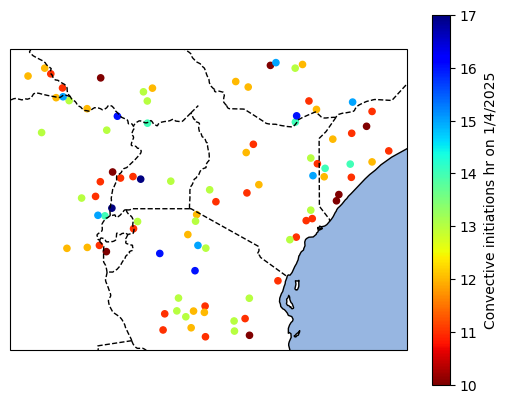

In [6]:
# plot the hr of day
fig, ax = plt.subplots(nrows=1, ncols=1,subplot_kw={'projection': ccrs.PlateCarree()})

#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
ax.coastlines()   ## adds coastlines
ax.add_feature(cf.BORDERS, linestyle='--')#,color='black') # adds country borders
ax.add_feature(cf.OCEAN) 
#    cax=cax,
p=gdf.plot(
    column= 'Hr_of_conv', 
    ax=ax, marker='o', 
    markersize=20,
    legend=True,
    cmap='jet_r',
    legend_kwds={"label": "Convective initiations hr on 1/4/2025", "orientation": "vertical"},
);
#xlim = ([np.min(lon), np.max(lon)])
#ylim = ([np.min(lat), np.max(lat)])
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#plt.show()

In [7]:
# plot mtg vis rad values for x hours prior to initiation 
one_event =filtered_df.iloc[0]
lat_conv_init =  one_event['latN_c']
lon_conv_init = one_event['lonE_c']
hr_of_conv =  one_event['hr']  #+3 # converted to local time
min_temp =  one_event['minT']
#one_event = filtered_df[(filtered_df['hr']> 8.9) & (filtered_df['hr']< 10.1)]
# select one initiation event
# find location in vis data
lat_ind = np.where((lat>=lat_conv_init-0.01) & (lat<=lat_conv_init+0.01))[0]
lon_ind = np.where((lon>=lon_conv_init-0.01) & (lon<=lon_conv_init+0.01))[0]
vis_lat = lat[lat_ind[0]:lat_ind[-1]+1]
vis_lon = lon[lat_ind[0]:lat_ind[-1]+1]

vis_one_event = np.nanmean(
    np.nanmean(hr_norm_vis[:,lat_ind[0]:lat_ind[-1]+1,lon_ind[0]:lon_ind[-1]+1],axis=1),axis=1)
np.array(vis_one_event).shape

(8,)

Text(0.5, 1.0, '-7.9S, 37.17E')

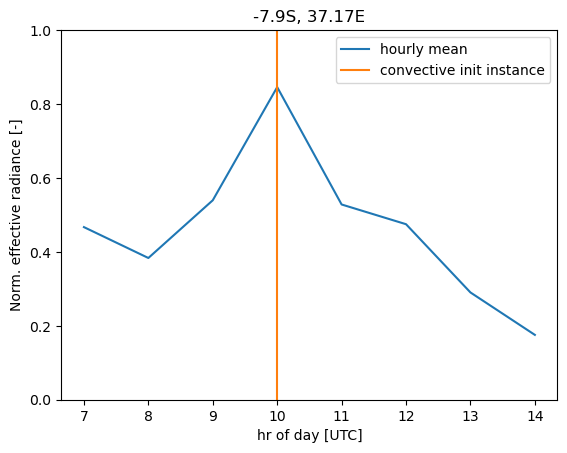

In [13]:
plt.plot(hours_of_day,vis_one_event,label='hourly mean')
plt.plot([hr_of_conv,hr_of_conv],[0,1],label='convective init instance')
plt.ylabel('Norm. effective radiance [-]')
plt.xlabel('hr of day [UTC]')
plt.legend()
plt.ylim(0,1)
plt.title(str(lat_conv_init)+'S, ' +str(lon_conv_init)+'E')
# grid scale = 0.0075 deg (less than km)